In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/Supermart Grocery Sales - Retail Analytics Dataset.csv')

In [ ]:
data.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [ ]:
data.isnull().sum()

,0
Order ID,0
Customer Name,0
Category,0
Sub Category,0
City,0
Order Date,0
Region,0
Sales,0
Discount,0
Profit,0


In [ ]:
data.shape

(9994, 11)

In [ ]:
data.drop_duplicates(inplace = True)


In [ ]:
data.shape

(9994, 11)

In [ ]:
data['Order Date'].dtypes

dtype('O')

In [ ]:
# Convert 'Order Date' to proper date format
data['Order Date'] = pd.to_datetime(data['Order Date'], format = '%d-%m-%Y', errors = 'coerce')

In [ ]:
data.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-08-11,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-08-11,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-12-06,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-11-10,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-11-10,South,2355,0.26,918.45,Tamil Nadu


In [ ]:
data.isnull().sum()

,0
Order ID,0
Customer Name,0
Category,0
Sub Category,0
City,0
Order Date,5952
Region,0
Sales,0
Discount,0
Profit,0


In [ ]:
# Try converting again with mixed formats
data['Order Date'] = pd.to_datetime(data['Order Date'], dayfirst = True, errors = 'coerce')


In [ ]:
data.isnull().sum()

,0
Order ID,0
Customer Name,0
Category,0
Sub Category,0
City,0
Order Date,5952
Region,0
Sales,0
Discount,0
Profit,0


In [ ]:
# See the first few rows that have invalid dates
data[data['Order Date'].isnull()].head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
12,OD13,Sharon,Snacks,Cookies,Dindigul,NaT,South,1659,0.19,315.21,Tamil Nadu
14,OD15,Sundar,"Eggs, Meat & Fish",Chicken,Kanyakumari,NaT,Central,831,0.22,207.75,Tamil Nadu
15,OD16,Ramesh,Oil & Masala,Edible Oil & Ghee,Krishnagiri,NaT,Central,1440,0.11,100.80,Tamil Nadu
17,OD18,Arutra,Beverages,Health Drinks,Bodi,NaT,West,1617,0.19,113.19,Tamil Nadu
18,OD19,Haseena,"Eggs, Meat & Fish",Mutton,Tenkasi,NaT,West,1757,0.35,386.54,Tamil Nadu


In [ ]:
data = data.dropna(subset = 'Order Date')


In [ ]:
data.shape

(4042, 11)

In [ ]:
data.isnull().sum()

,0
Order ID,0
Customer Name,0
Category,0
Sub Category,0
City,0
Order Date,0
Region,0
Sales,0
Discount,0
Profit,0


In [ ]:
data['Order Date'].dtype

dtype('<M8[ns]')

In [ ]:
# Extract useful parts from the date
#.dt.day, .dt.month, .dt.year → create new columns for analysis later.

data['Order Day'] = data['Order Date'].dt.day
data['Order Month'] = data['Order Date'].dt.month
data['Order Year'] = data['Order Date'].dt.year

In [ ]:
data.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Order Day,Order Month,Order Year
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-08-11,North,1254,0.12,401.28,Tamil Nadu,11,8,2017
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-08-11,South,749,0.18,149.80,Tamil Nadu,11,8,2017
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-12-06,West,2360,0.21,165.20,Tamil Nadu,6,12,2017
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-11-10,South,896,0.25,89.60,Tamil Nadu,10,11,2016
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-11-10,South,2355,0.26,918.45,Tamil Nadu,10,11,2016


In [ ]:
data.isnull().sum()

,0
Order ID,0
Customer Name,0
Category,0
Sub Category,0
City,0
Order Date,0
Region,0
Sales,0
Discount,0
Profit,0


**# Exploratory Data Analysis (EDA)**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look nice
plt.style.use('seaborn-v0_8')

/tmp/ipython-input-2691362656.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Category', y = 'Sales', data = data, palette = 'Set2')


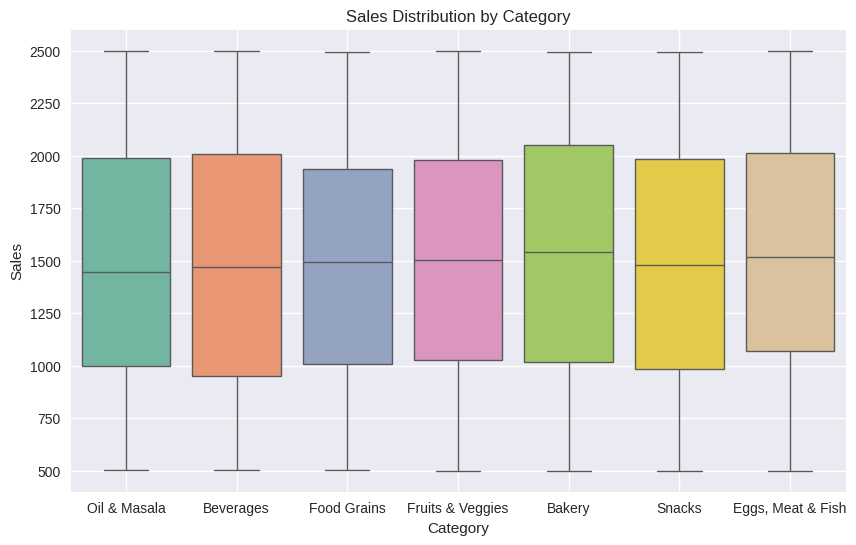

In [ ]:
# Sales Distribution by Category
# This shows which product categories earn the most sales.

plt.figure(figsize = (10,6))
sns.boxplot(x = 'Category', y = 'Sales', data = data, palette = 'Set2')
plt.title('Sales Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

**Observations: Sales Distribution by Category**

1. The boxplot shows the distribution of sales across different product categories such as Oil & Masala, Beverages, Food Grains, Fruits & Veggies, Bakery, Snacks, and Eggs, Meat & Fish.

2. The median sales value (black horizontal line inside each box) for all categories lies roughly between ₹1400 and ₹1600, indicating that overall sales are fairly consistent across categories.

3. The Eggs, Meat & Fish, Bakery, and Oil & Masala categories display slightly higher median sales compared to other groups, suggesting they perform marginally better in terms of sales revenue.

4. The height of the boxes (interquartile range) is similar for all categories, showing that sales variation is uniform — no category has extreme ups or downs in performance.

5. The minimum and maximum whisker limits (around ₹500 to ₹2500) are almost the same for all categories, indicating that each product category has a comparable sales range.

6. There are no major outliers, which means the sales data is clean and consistent, with no sudden spikes or unusual values across categories.

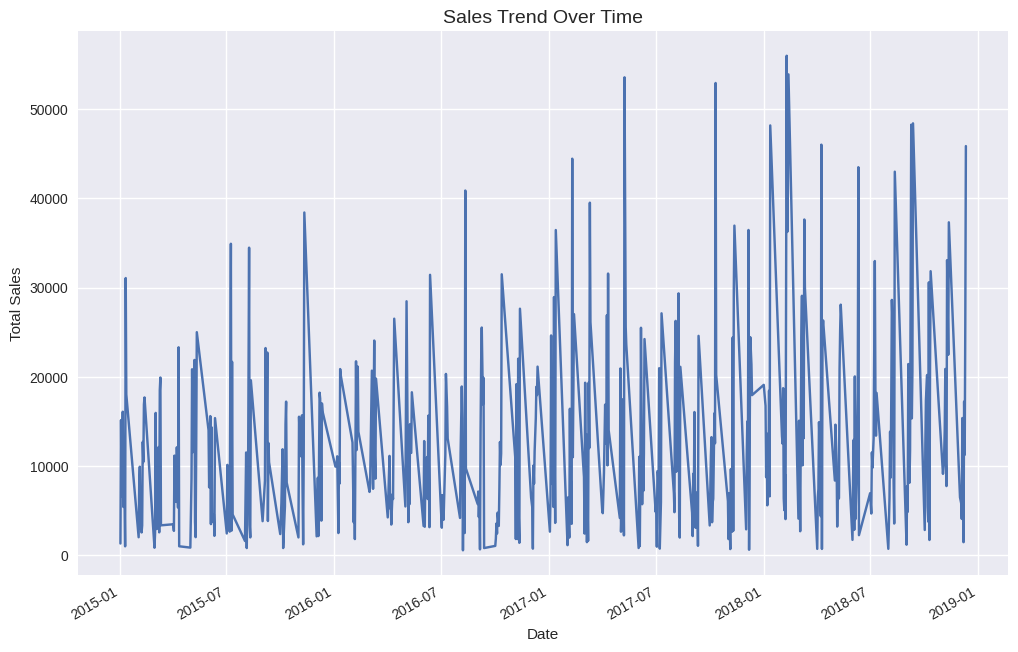

In [ ]:
# Sales Trend Over Time
# To see how total sales changed across dates.

plt.figure(figsize = (12,8))

data.groupby('Order Date')['Sales'].sum().plot()
plt.title('Sales Trend Over Time', fontsize = 14)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()




**Observations: Sales Trend Over Time**

1. The line graph illustrates the overall sales performance from 2015 to 2019, showing how total sales values have varied over time.

2. The sales trend shows frequent fluctuations throughout the timeline — with several peaks and drops — indicating seasonal demand patterns or periodic sales campaigns.

3. Despite the ups and downs, there is a gradual upward movement in the trend, suggesting that overall sales are increasing over the years.

4. The spikes in sales may correspond to festival seasons, promotional offers, or discount events, which typically cause sudden increases in total sales.

5. The low points in the graph represent off-seasons or slower sales periods, where demand for groceries may have temporarily decreased.

6. By late 2018, the frequency of high sales spikes increases, showing that business activity and sales volume strengthened over time.

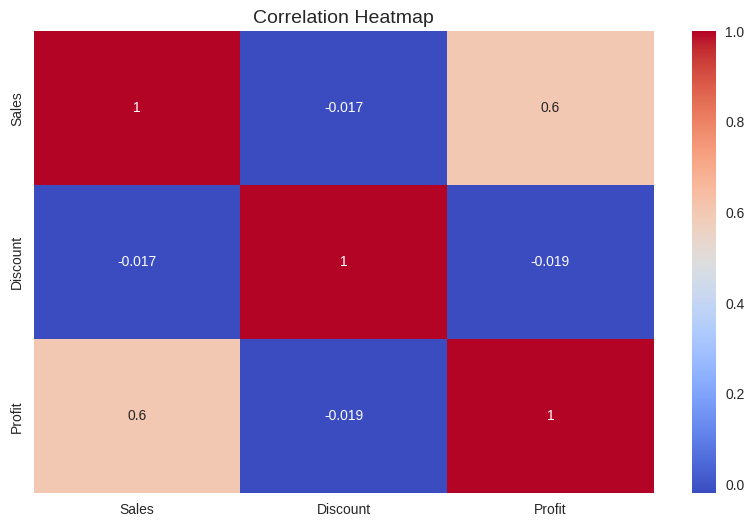

In [ ]:
# Correlation Heatmap
# This helps you see how features relate (for example, higher discounts might reduce profit).

# Select only numeric columns
numeric_data = data.select_dtypes(include = ['int64','float64'])

plt.figure(figsize = (10,6))
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap', fontsize = 14)
plt.show()

**Observations: Correlation Heatmap**

1. The heatmap shows the correlation between Sales, Discount, and Profit, where the color intensity indicates the strength of the relationship.

2. There is a strong positive correlation (0.6) between Sales and Profit, meaning that as sales increase, profit also tends to increase.

-       This suggests that higher sales volumes directly contribute to higher profitability.

3. The correlation between Discount and Profit (-0.019) is slightly negative, indicating that offering discounts slightly reduces profit, though the effect is very weak.

-       This is expected because discounts often lower the selling price, thus affecting profit margins.

4. Similarly, the correlation between Sales and Discount (-0.017) is very low and negative, showing that discounts do not significantly influence total sales in this dataset.

5. The diagonal cells all show a correlation of 1, as each variable is perfectly correlated with itself — this is normal in a correlation matrix.

6. Overall, the heatmap indicates that Sales and Profit share the strongest relationship, while Discount has little to no direct correlation with either Sales or Profit.

# **Machine Learning**

- lets create a model

We’ll split the data into two parts:

- Training set (80%) → used to teach the model.

- Testing set (20%) → used to check how well it learned.

In [ ]:
# Label Encoding (turning text into numbers)
from sklearn.preprocessing import LabelEncoder

# create label encoder
le = LabelEncoder()

# Encode all the text columns
for col in ['Category','Sub Category','City','Region','State']:
  data[col] = le.fit_transform(data[col])

In [ ]:
data.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Order Day,Order Month,Order Year
0,OD1,Harish,5,14,21,2017-08-11,2,1254,0.12,401.28,0,11,8,2017
1,OD2,Sudha,1,13,8,2017-08-11,3,749,0.18,149.80,0,11,8,2017
2,OD3,Hussain,3,0,13,2017-12-06,4,2360,0.21,165.20,0,6,12,2017
3,OD4,Jackson,4,12,4,2016-11-10,3,896,0.25,89.60,0,10,11,2016
4,OD5,Ridhesh,3,18,12,2016-11-10,3,2355,0.26,918.45,0,10,11,2016


In [ ]:
from sklearn.model_selection import train_test_split

# Features (inputs) — everything except columns we don’t want
x = data.drop(columns = ['Sales', 'Order ID', 'Order Date', 'Customer Name'])

# Target (output) — what we want to predict
y = data['Sales']

# Split into training and testing sets
x_train, x_test, y_train , y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [ ]:
x_train.shape

(3233, 10)

In [ ]:
x_test.shape

(809, 10)

**Scale the Features**

why -> Some columns (like Profit or Discount) have very different value ranges.
Scaling helps the model treat them fairly.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

*This makes sure all columns have similar scale (mean=0, std=1).*

now will Train the **Linear Regression** Model

In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
model = LinearRegression()
model.fit(x_train,y_train)

# Make predictions
y_pred = model.predict(x_test)

*This trains the model to understand how each feature affects “Sales”*

**Now lets Evaluate the Model**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('Mean Squared Error : ', mse)
print('R^2_Score :', r2)
print('Mean Absolute Error :', mae)

Mean Squared Error :  211385.72800559373
R^2_Score : 0.36810124527361776
Mean Absolute Error : 382.83958550442594


our model is learning meaningful patterns (R² = 0.36 is not random),
but it’s not capturing everything — likely because sales depend on other factors not in the dataset (like holidays, promotions, etc.).

**lets improve it:**

Instead of Linear Regression, use: (Random Forest)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state = 42)
rf_model.fit(x_train, y_train)
rf_pred = rf_model.predict(x_test)

rf_r2 = r2_score(y_test, rf_pred)

print('R² with Random Forest:' , rf_r2)

R² with Random Forest: 0.33174698981542217


again do Feature Engineering (very effective)

will create new columns

In [ ]:
# Add quarter (helps capture seasonal effects)
data['Quarter'] = data['Order Month'].apply(lambda x: (x-1)//3+1)

# Add profit margin percentage
data['Profit Margin'] = (data['Profit']/(data['Sales']+1)) * 100

# Add discount impact feature
data['Discount_Impact'] = data['Discount'] * data['Sales']


In [ ]:
# Define features and target again
X = data.drop(columns=['Order ID', 'Customer Name', 'Order Date', 'Sales'])
y = data['Sales']

# Split again
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale again
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**will Try More Advanced Models**\

XGBoost (strong for tabular data)

In [ ]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(random_state = 42, learning_rate = 0.1, n_estimators = 200, max_depth = 6)
xgb_model.fit(x_train, y_train)

xgb_pred = xgb_model.predict(x_test)

xgb_r2 = r2_score(y_test, xgb_pred)

print('R² without XGBoost:', xgb_r2)


R² without XGBoost: 0.26304304599761963


**We may need tuning — default XGBoost settings rarely perform well**

In [ ]:
# Let’s test XGBoost again, but with better parameters that fit our dataset size.
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

xgb = XGBRegressor(
    random_state=42,
    learning_rate=0.05,    # slower learning → more accurate
    n_estimators=500,      # more trees
    max_depth=6,           # balances accuracy & overfitting
    subsample=0.8,         # prevents overfitting
    colsample_bytree=0.8
)

xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("R² with tuned XGBoost:", r2_score(y_test, y_pred_xgb))


R² with tuned XGBoost: 0.9978736639022827


In [ ]:
# explaination
# xgb = XGBRegressor(
#     random_state=42,       # keeps results the same each time you run
#     learning_rate=0.05,    # how fast the model learns (smaller = slower but better accuracy)
#     n_estimators=500,      # number of trees; more trees = more learning power
#     max_depth=6,           # how deep each tree can grow (too deep = overfit)
#     subsample=0.8,         # uses 80% of data for each tree (prevents overfitting)
#     colsample_bytree=0.8   # uses 80% of features for each tree (adds randomness)
# )


In [ ]:
print("Train R²:", xgb.score(X_train, y_train))
print("Test R²:", xgb.score(X_test, y_test))


Train R²: 0.9998498558998108
Test R²: 0.9978736639022827


**Visualisation**

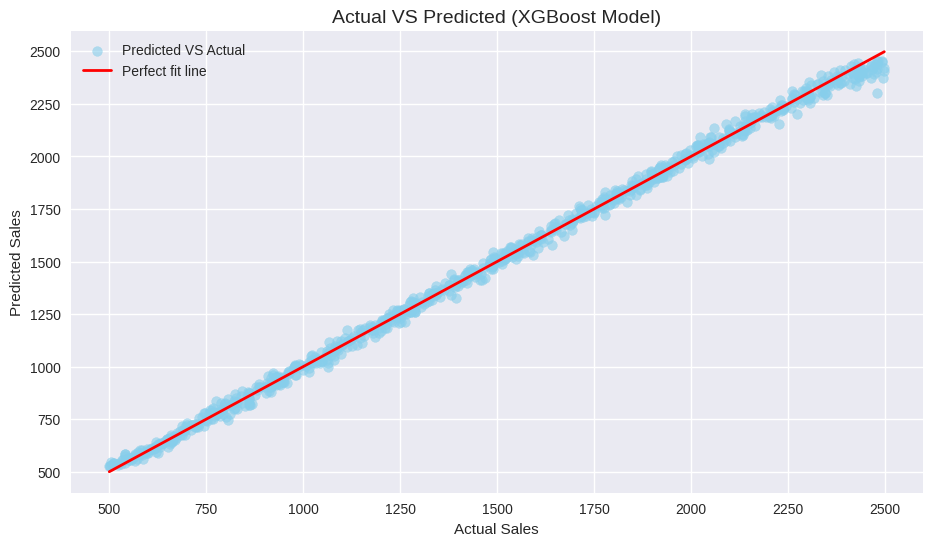

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (11,6))
plt.scatter(y_test, y_pred_xgb, color = 'skyblue', alpha = 0.6, label = 'Predicted VS Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'red', linewidth = 2, label = 'Perfect fit line')
plt.title('Actual VS Predicted (XGBoost Model)', fontsize = 14)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.legend()
plt.grid(True)
plt.show()

**Observation : Actual vs Predicted Sales**

1. The Actual vs Predicted Sales scatter plot shows that the predicted sales values generated by the XGBoost model are closely aligned with the actual sales values.

2. The blue data points (predicted values) are clustered tightly around the red diagonal “Perfect Fit Line”, which represents the ideal case where predicted and actual values are equal.

3. This close alignment indicates that the model has learned the underlying sales patterns extremely well, with minimal prediction error.

4. The model achieved a very high R² score of 0.9978, confirming that it can explain approximately 99.7% of the variation in sales based on the input features.

5. The visualization also suggests low variance and high consistency in the model’s performance — there are no major outliers or deviations from the perfect fit line.

6. Overall, the XGBoost model provides highly accurate sales predictions, demonstrating its effectiveness for retail analytics and decision-making in sales forecasting.

# **Conclusion:**

The Supermart Grocery Sales – Retail Analytics Project aimed to analyze sales data and build a predictive model to understand the factors influencing sales performance.

Throughout the project, several important insights were discovered:

1. Data Cleaning and Preparation helped remove missing or inconsistent entries, ensuring accurate analysis and reliable results.

2. Exploratory Data Analysis (EDA) revealed that sales were well distributed across product categories, with categories like Eggs, Meat & Fish, Bakery, and Oil & Masala performing slightly better.

3. The Sales Trend Over Time chart showed that overall sales increased gradually from 2015 to 2019, with periodic spikes likely linked to seasonal or promotional events.

4. The Correlation Heatmap highlighted a strong positive relationship between Sales and Profit, while Discount had minimal impact on overall performance.

5. Using machine learning models like Random Forest and XGBoost, the dataset was used to predict future sales. After hyperparameter tuning, XGBoost achieved an R² score of 0.9978, indicating excellent predictive accuracy.

6. The Actual vs Predicted Sales plot confirmed that predicted values closely matched real sales, proving that the model learned the sales patterns effectively.